In [22]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

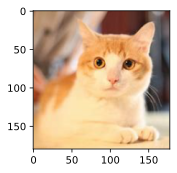

In [23]:
d2l.set_figsize()
img = d2l.Image.open('../image/cat1.jpg')
d2l.plt.imshow(img)

In [24]:
def apply(img , aug , num_row = 2 , num_col = 4 , scale = 1.5):
    Y = [aug(img) for _ in range(num_row * num_col)]
    d2l.show_images(Y,num_row,num_col,scale=scale)#aug图片增广的办法

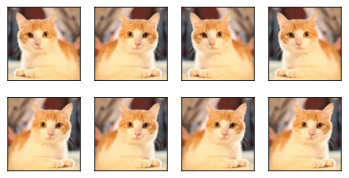

In [25]:
apply(img , torchvision.transforms.RandomHorizontalFlip())#水平方向随机翻转

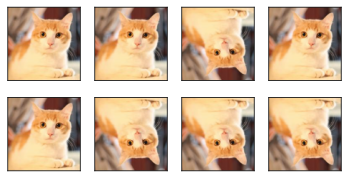

In [26]:
apply(img,torchvision.transforms.RandomVerticalFlip())

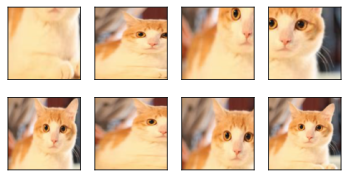

In [27]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (200,200),scale=(0.1,1),ratio=(0.5,2)#不管crop了哪个位置，最后都放大到200*200，scale就是在多大的区域裁剪0.1就是10%，ratio就是高宽比
)
apply(img,shape_aug)

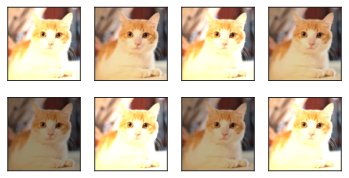

In [28]:
apply(img,torchvision.transforms.ColorJitter(brightness=0.5,contrast=0,saturation=0,hue=0))#brightness亮度增加百分比，contrast对比度，saturation饱和度，hue色调

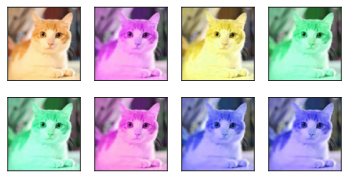

In [29]:
apply(img,torchvision.transforms.ColorJitter(brightness=0,contrast=0,saturation=0,hue=0.5))#改变色调

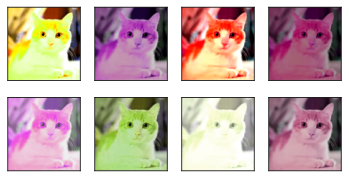

In [30]:
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5,contrast=0.5,saturation=0.5,hue=0.5
)
apply(img,color_aug)

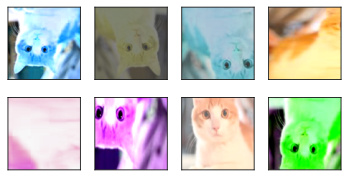

In [31]:
#一般来说我们是好几个增广一起叠加
aug = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    shape_aug,
    color_aug
])
apply(img,aug)

Files already downloaded and verified


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

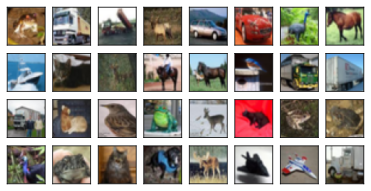

In [32]:
#使用图像增广训练
all_image = torchvision.datasets.CIFAR10(train=True,root='../data',download=True)
d2l.show_images([all_image[i][0] for i in range(32)],4,8,scale = 0.8)

loss 1.007, train acc 0.644, test acc 0.585
1204.2 examples/sec on cuda:0


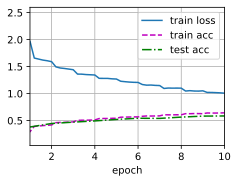

In [33]:
from torch.utils import data
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()
])
test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
train_set = torchvision.datasets.CIFAR10(train=True,root='../data',download=True,transform=train_augs)
test_set = torchvision.datasets.CIFAR10(train=False,root='../data',download=True,transform=test_augs)
train_iter = data.DataLoader(dataset=train_set , batch_size=256 , shuffle=True)
test_iter = data.DataLoader(dataset=test_set, batch_size=256 , shuffle=False)
net = d2l.resnet18(10 , 3)
def init_weight(m):
    if type(m) in [nn.Linear,nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)
net.apply(init_weight)
d2l.train_ch6(net, train_iter, test_iter, 10, 0.001, d2l.try_gpu())